<a href="https://colab.research.google.com/github/kaggle-Challenge-Team-9/Kaggle_challenge/blob/main/Kaggle_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from google.colab import files
from sklearn.svm import SVC


In [ ]:
# Loading the train datset
training_data = 'https://raw.githubusercontent.com/kaggle-Challenge-Team-9/Kaggle_challenge/main/train.csv'
train = pd.read_csv(training_data)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
# Loading the test dataset
test_data = 'https://raw.githubusercontent.com/kaggle-Challenge-Team-9/Kaggle_challenge/main/test.csv'
test = pd.read_csv(test_data)
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
# Printing the shape of train data
print("The shape of the train dataset is: ", train.shape)

# Printing the shape of test data
print("The shape of the test dataset is: ", test.shape)

The shape of the train dataset is:  (8693, 14)
The shape of the test dataset is:  (4277, 13)


<ipython-input-5-f379c7fb0143>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True, square = False, linewidths = 2,


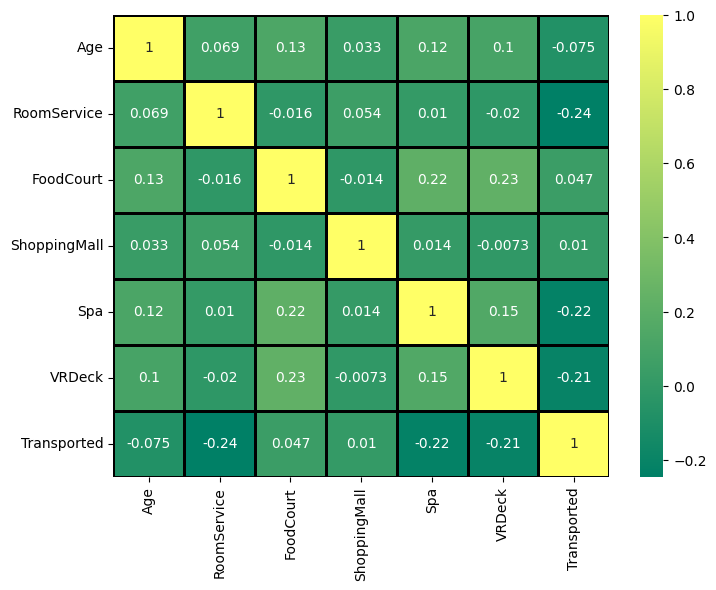

In [ ]:
# plotting correlation heatmap

plt.figure(figsize = [8, 6], clear = True , facecolor = 'white')
sns.heatmap(train.corr(), annot = True, square = False, linewidths = 2,
            linecolor = "black", cmap = "summer");

In [ ]:
# Finding null values in train
null_values = train.isnull().sum()

# Print out columns with null values, if any
print("Columns with null values:")
print(null_values[null_values < 0])

Columns with null values:
Series([], dtype: int64)


In [ ]:
# Finding null values in test
null_values = test.isnull().sum()

# Print out columns with null values, if any
print("Columns with null values:")
print(null_values[null_values > 0])

Columns with null values:
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


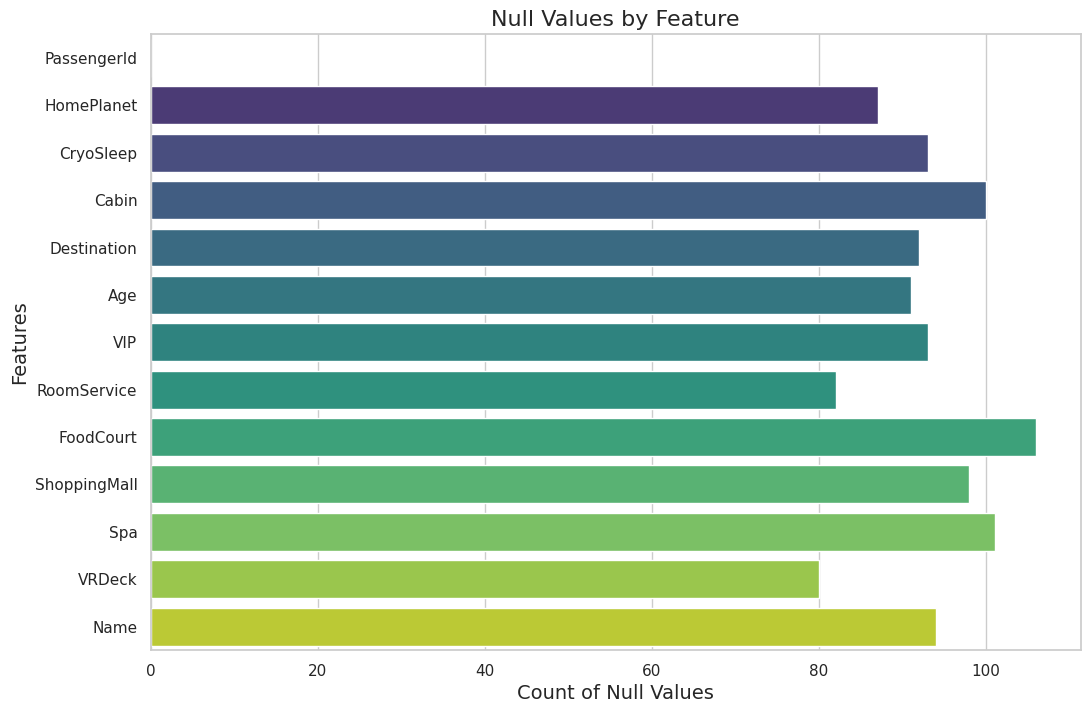

In [ ]:
# Setting up the aesthetics for seaborn
sns.set(style="whitegrid")

# Plotting the null values
plt.figure(figsize=(12, 8))
sns.barplot(x=null_values.values, y=null_values.index, hue=null_values.index, palette="viridis", dodge=False)
plt.title("Null Values by Feature", fontsize=16)
plt.xlabel("Count of Null Values", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.legend([],[], frameon=False)
plt.show()


In [ ]:
# Finding the categorical variables in train
print('Categorical Variables')
for col in train.select_dtypes(include=['object']).columns:
    print(col)

# Finding the numerical variables in train
print('Numerical Variables')
for col in train.select_dtypes(include=['float64']).columns:
    print(col)


Categorical Variables
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name
Numerical Variables
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [ ]:
# Finding the categorical variables in test
print('Categorical Variables')
for col in test.select_dtypes(include=['object']).columns:
    print(col)

# Finding the numerical variables in test
print('Numerical Variables')
for col in test.select_dtypes(include=['float64']).columns:
    print(col)

Categorical Variables
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name
Numerical Variables
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [ ]:
# Preprocessing
# Numerical features vs transported
# Numerical features with histograms
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Plotting histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(data=train, x=feature, hue='Transported', multiple="stack", ax=axes[row, col], palette="rocket", bins=30, kde=True)
    axes[row, col].set_title(f'{feature} vs Transported', fontsize=14)
    axes[row, col].set_xlabel(feature, fontsize=12)
    axes[row, col].set_ylabel('Count', fontsize=12)

# Adjusting layout
plt.tight_layout()
plt.show()


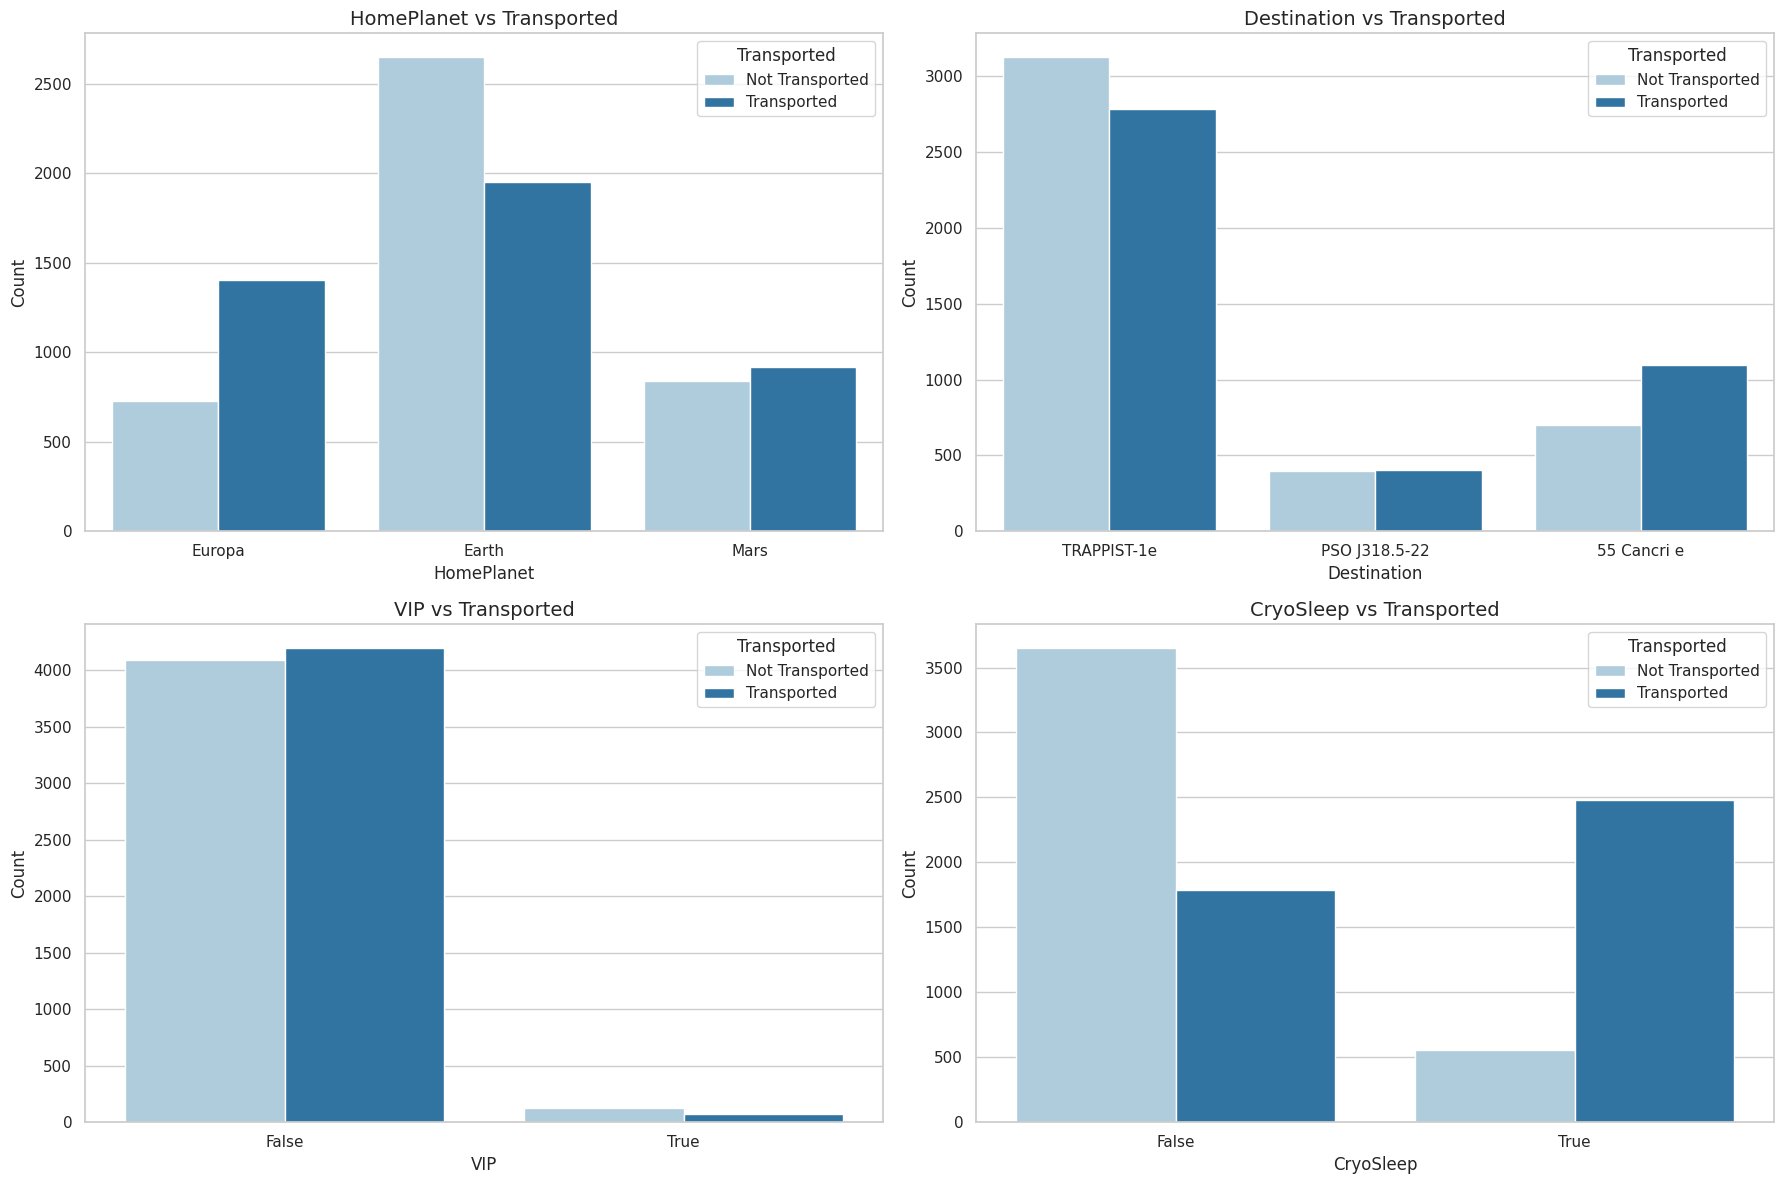

In [ ]:
# Categorical features vs transported
categorical_features = ['HomePlanet', 'Destination', 'VIP', 'CryoSleep']

# Create subplots for each categorical feature
plt.figure(figsize=(18, 12))
for i, feature in enumerate(categorical_features, start=1):
    plt.subplot(2, 2, i)
    sns.countplot(data=train, x=feature, hue='Transported', palette="Paired")
    plt.title(f'{feature} vs Transported', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Transported', labels=['Not Transported', 'Transported'])
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
# Define imputer for categorical features (fill with mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Define imputer for numerical features (fill with median)
numerical_imputer = SimpleImputer(strategy='median')

# Define columns by data type
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Applying imputation to train dataset
train[categorical_cols] = categorical_imputer.fit_transform(train[categorical_cols])
train[numerical_cols] = numerical_imputer.fit_transform(train[numerical_cols])

# Applying imputation to test dataset
if 'test' in globals():
    test[categorical_cols] = categorical_imputer.transform(test[categorical_cols])
    test[numerical_cols] = numerical_imputer.transform(test[numerical_cols])

train.head()

In [ ]:
# Finding null values
null_values = train.isnull().sum()

# Print out columns with null values, if any
print("Columns with null values:")
print(null_values[null_values > 0])

In [ ]:
# Finding null values
null_values = test.isnull().sum()

# Print out columns with null values, if any
print("Columns with null values:")
print(null_values[null_values > 0])

In [ ]:
# Dropping passenger_id and name from both test and train
train.drop(['PassengerId', 'Name'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
# Splitting cabin into deck, num and side for train
train[['deck', 'num','side']] = train['Cabin'].str.split('/', expand=True)
train=train.drop(['Cabin'],axis=1)
train.head()

In [ ]:
# Splitting cabin into deck, num and side for test
test[['deck', 'num','side']] = test['Cabin'].str.split('/', expand=True)
test=test.drop(['Cabin'],axis=1)
test.head()

In [ ]:
train.head()

In [ ]:
# Convert categorical features to numerical using one-hot encoding
train = pd.get_dummies(train, columns=['HomePlanet', 'Destination', 'VIP', 'deck', 'side'])
# Converting boolean 'CryoSleep' and 'Transported' to numerical
train['CryoSleep'] = train['CryoSleep'].astype(int)
train['Transported'] = train['Transported'].astype(int)

# Updated DataFrame
train.head()


In [ ]:
# Convert categorical features to numerical using one-hot encoding
test = pd.get_dummies(test, columns=['HomePlanet', 'Destination', 'VIP', 'deck', 'side'])

# Convert boolean 'CryoSleep' and 'Transported' to numerical
test['CryoSleep'] = test['CryoSleep'].astype(int)

# Updated DataFrame
test.head()


In [ ]:
mode_num = train['num'].mode()[0]

# Fill missing values in the 'num' column with the mode for train
train['num'].fillna(mode_num, inplace=True)

mode_num = test['num'].mode()[0]

# Fill missing values in the 'num' column with the mode for test
test['num'].fillna(mode_num, inplace=True)


In [ ]:
# Finding null values
null_values = train.isnull().sum()

# Print out columns with null values, if any
print("Columns with null values:")
print(null_values[null_values > 0])

In [ ]:
# Finding null values
null_values = test.isnull().sum()

# Print out columns with null values, if any
print("Columns with null values:")
print(null_values[null_values > 0])

In [ ]:
X_test = test

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(train.drop('Transported', axis=1), train['Transported'], test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)
accuracy_rf = rf_model.score(X_val, y_val)
print('validation accuracy', accuracy_rf)
y_pred = rf_model.predict(X_test)
test = pd.read_csv(test_data)
# Preparing the Kaggle submission file
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': y_pred})

# Converting 0s and 1s to "False" and "True"
submission['Transported'] = submission['Transported'].map({0: False, 1: True})

# Write the DataFrame to a .csv file
submission.to_csv('submission.csv', index=False)

# Download the .csv file
files.download('submission.csv')


In [ ]:
# Evaluate Random Forest model
rf_accuracy = rf_model.score(X_val, y_val)
print("Random Forest Validation Accuracy:", rf_accuracy)

# Confusion Matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_val, rf_model.predict(X_val))
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)

# Classification Report for Random Forest
rf_classification_report = classification_report(y_val, rf_model.predict(X_val))
print("Random Forest Classification Report:")
print(rf_classification_report)


In [ ]:
# Initialize the Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting model on the training data
gbm_model.fit(X_train, y_train)

# Evaluate the model
accuracy_gb = gbm_model.score(X_val, y_val)
print("Validation Accuracy:", accuracy_gb)

# Predict on the test data
y_pred_gbm = gbm_model.predict(X_test)

# Prepare the Kaggle submission file
submission_gbm = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': y_pred_gbm})
submission_gbm['Transported'] = submission_gbm['Transported'].map({0: False, 1: True})

# Write the DataFrame to a .csv file
submission_gbm.to_csv('submission_gbm.csv', index=False)

# Download the .csv file
files.download('submission_gbm.csv')


In [ ]:
# Evaluate Gradient Boosting model
gbm_accuracy = gbm_model.score(X_val, y_val)
print("Gradient Boosting Validation Accuracy:", gbm_accuracy)

# Confusion Matrix for Gradient Boosting
gbm_conf_matrix = confusion_matrix(y_val, gbm_model.predict(X_val))
print("Gradient Boosting Confusion Matrix:")
print(gbm_conf_matrix)

# Classification Report for Gradient Boosting
gbm_classification_report = classification_report(y_val, gbm_model.predict(X_val))
print("Gradient Boosting Classification Report:")
print(gbm_classification_report)


In [ ]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model on the training data
logistic_model.fit(X_train, y_train)

# Evaluate the model
accuracy_logistic = logistic_model.score(X_val, y_val)
print("Logistic Regression Validation Accuracy:", accuracy_logistic)

# Generate predictions for the test set
logistic_predictions = logistic_model.predict(X_test)

# Prepare the Kaggle submission file for Logistic Regression
submission_logistic = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': logistic_predictions})
submission_logistic['Transported'] = submission_logistic['Transported'].map({0: False, 1: True})

# Write the DataFrame to a .csv file
submission_logistic.to_csv('submission_logistic.csv', index=False)

# Download the .csv file
files.download('submission_logistic.csv')

In [ ]:
# Evaluate logistic model
accuracy_logistic = logistic_model.score(X_val, y_val)
print("Logistic regression model accuracy:", accuracy_logistic)

# Confusion Matrix for logistic
logistic_conf_matrix = confusion_matrix(y_val, logistic_model.predict(X_val))
print("Logistic Confusion Matrix:")
print(logistic_conf_matrix)

# Classification Report for logistic
logistic_classification_report = classification_report(y_val, logistic_model.predict(X_val))
print("logistic Classification Report:")
print(logistic_classification_report)

In [ ]:
# Initialize the KNeighborsClassifier model
knn_model = KNeighborsClassifier()

# Train the KNeighborsClassifier model on the training data
knn_model.fit(X_train, y_train)

# Evaluate the model
accuracy_knn = knn_model.score(X_val, y_val)
print("Validation Accuracy (KNeighborsClassifier):", accuracy_knn)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Prepare the Kaggle submission file
submission_knn = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': y_pred_knn})
submission_knn['Transported'] = submission_knn['Transported'].map({0: False, 1: True})

# Write the DataFrame to a .csv file
submission_knn.to_csv('submission_knn.csv', index=False)

# Download the .csv file
files.download('submission_knn.csv')


In [ ]:
# Evaluate knn model
accuracy_knn = knn_model.score(X_val, y_val)
print("knn regression model accuracy:", accuracy_knn)

# Confusion Matrix for knn
knn_conf_matrix = confusion_matrix(y_val, knn_model.predict(X_val))
print("knn Confusion Matrix:")
print(knn_conf_matrix)

# Classification Report for knn
knn_classification_report = classification_report(y_val, knn_model.predict(X_val))
print("knn Classification Report:")
print(knn_classification_report)

In [ ]:
# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_model.fit(X_train, y_train)

# Evaluate the model
accuracy_dt = dt_model.score(X_val, y_val)
print("Validation Accuracy (Decision Tree):", accuracy_dt)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)

# Prepare the Kaggle submission file
submission_dt = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': y_pred_dt})
submission_dt['Transported'] = submission_dt['Transported'].map({0: False, 1: True})

# Write the DataFrame to a .csv file
submission_dt.to_csv('submission_dt.csv', index=False)

# Download the .csv file
files.download('submission_dt.csv')


In [ ]:
# Evaluate dt model
accuracy_dt = dt_model.score(X_val, y_val)
print("dt regression model accuracy:", accuracy_dt)

# Confusion Matrix for dt
dt_conf_matrix = confusion_matrix(y_val, dt_model.predict(X_val))
print("dt Confusion Matrix:")
print(dt_conf_matrix)

# Classification Report for dt
dt_classification_report = classification_report(y_val, dt_model.predict(X_val))
print("dt Classification Report:")
print(dt_classification_report)

In [38]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Evaluate the model
accuracy_svm = svm_model.score(X_val, y_val)
print("Validation Accuracy (SVM):", accuracy_svm)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Prepare the Kaggle submission file
submission_svm = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': y_pred_svm})
submission_svm['Transported'] = submission_svm['Transported'].map({0: False, 1: True})

# Write the DataFrame to a .csv file
submission_svm.to_csv('submission_svm.csv', index=False)

# Download the .csv file
files.download('submission_svm.csv')


Validation Accuracy (SVM): 0.772857964347326


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
# Evaluate svm model
accuracy_svm = svm_model.score(X_val, y_val)
print("svm model accuracy:", accuracy_svm)

# Confusion Matrix for svm
dt_conf_matrix = confusion_matrix(y_val, svm_model.predict(X_val))
print("dt Confusion Matrix:")
print(dt_conf_matrix)

# Classification Report for svm
svm_classification_report = classification_report(y_val, svm_model.predict(X_val))
print("svm Classification Report:")
print(svm_classification_report)

svm model accuracy: 0.772857964347326
dt Confusion Matrix:
[[573 288]
 [107 771]]
svm Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.67      0.74       861
           1       0.73      0.88      0.80       878

    accuracy                           0.77      1739
   macro avg       0.79      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739



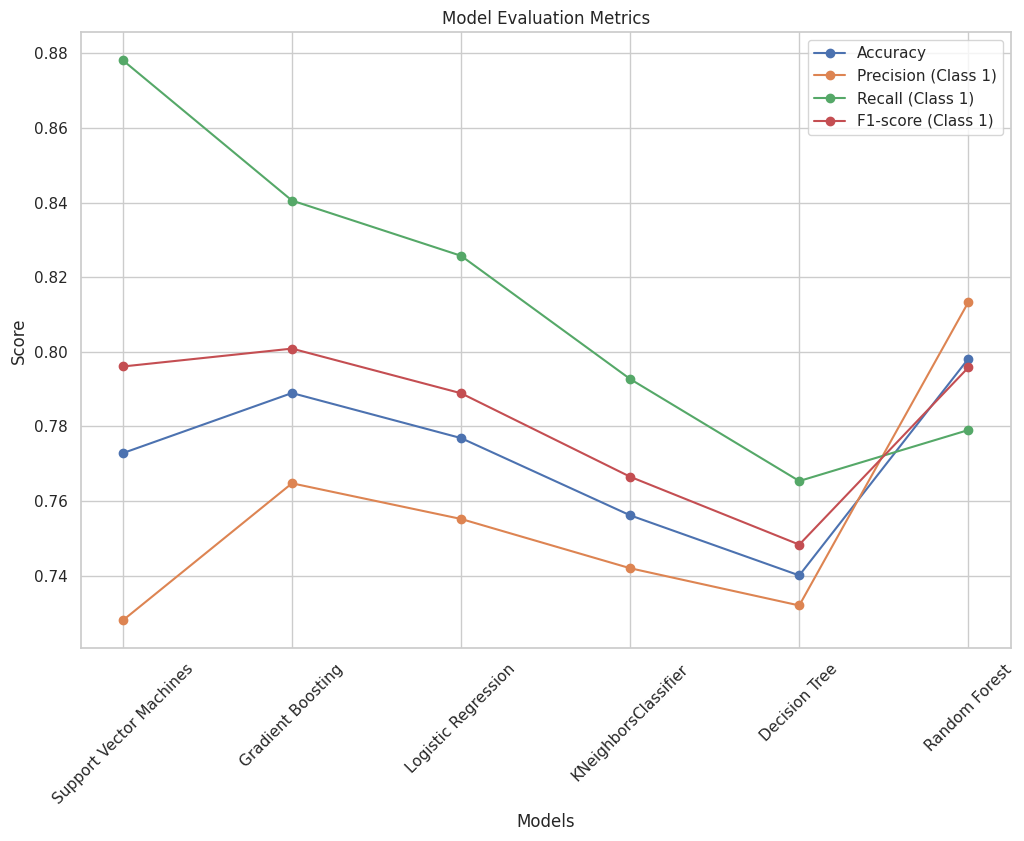

In [41]:
# Accuracy scores
models = ['Support Vector Machines', 'Gradient Boosting', 'Logistic Regression', 'KNeighborsClassifier', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_svm, accuracy_gb, accuracy_logistic, accuracy_knn, accuracy_dt, rf_accuracy]

# Precision, recall, F1-score for class 1
precision = {
    'Support Vector Machines': precision_recall_fscore_support(y_val, svm_model.predict(X_val))[0][1],
    'Gradient Boosting': precision_recall_fscore_support(y_val, gbm_model.predict(X_val))[0][1],
    'Logistic Regression': precision_recall_fscore_support(y_val, logistic_model.predict(X_val))[0][1],
    'KNeighborsClassifier': precision_recall_fscore_support(y_val, knn_model.predict(X_val))[0][1],
    'Decision Tree': precision_recall_fscore_support(y_val, dt_model.predict(X_val))[0][1],
    'Random Forest': precision_recall_fscore_support(y_val, rf_model.predict(X_val))[0][1]
}
recall = {
    'Support Vector Machines': precision_recall_fscore_support(y_val, svm_model.predict(X_val))[1][1],
    'Gradient Boosting': precision_recall_fscore_support(y_val, gbm_model.predict(X_val))[1][1],
    'Logistic Regression': precision_recall_fscore_support(y_val, logistic_model.predict(X_val))[1][1],
    'KNeighborsClassifier': precision_recall_fscore_support(y_val, knn_model.predict(X_val))[1][1],
    'Decision Tree': precision_recall_fscore_support(y_val, dt_model.predict(X_val))[1][1],
    'Random Forest': precision_recall_fscore_support(y_val, rf_model.predict(X_val))[1][1]
}
f1_score = {
    'Support Vector Machines': precision_recall_fscore_support(y_val, svm_model.predict(X_val))[2][1],
    'Gradient Boosting': precision_recall_fscore_support(y_val, gbm_model.predict(X_val))[2][1],
    'Logistic Regression': precision_recall_fscore_support(y_val, logistic_model.predict(X_val))[2][1],
    'KNeighborsClassifier': precision_recall_fscore_support(y_val, knn_model.predict(X_val))[2][1],
    'Decision Tree': precision_recall_fscore_support(y_val, dt_model.predict(X_val))[2][1],
    'Random Forest': precision_recall_fscore_support(y_val, rf_model.predict(X_val))[2][1]
}

# Plotting
plt.figure(figsize=(12, 8))

# Plot accuracy
plt.plot(models, accuracies, marker='o', label='Accuracy')

# Plot precision for class 1
plt.plot(models, [precision[model] for model in models], marker='o', label='Precision (Class 1)')

# Plot recall for class 1
plt.plot(models, [recall[model] for model in models], marker='o', label='Recall (Class 1)')

# Plot F1-score for class 1
plt.plot(models, [f1_score[model] for model in models], marker='o', label='F1-score (Class 1)')

# Add legend and labels
plt.legend()
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()


In [42]:
# Importing necessary libraries
import pandas as pd

# Creating a DataFrame with model names
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Gradient Boosting', 'Logistic Regression', 'KNeighborsClassifier', 'Decision Tree', 'Random Forest'],
    'Score': [accuracy_svm, accuracy_gb, accuracy_logistic, accuracy_knn, accuracy_dt, rf_accuracy] # Add the corresponding scores here
})

# Sorting the DataFrame by the 'Score' column in descending order
models.sort_values(by='Score', ascending=False, inplace=True)

# Displaying the sorted DataFrame
print(models)


                     Model     Score
5            Random Forest  0.798160
1        Gradient Boosting  0.788959
2      Logistic Regression  0.776883
0  Support Vector Machines  0.772858
3     KNeighborsClassifier  0.756182
4            Decision Tree  0.740081


In [43]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.4 MB/s eta 0:00:00


In [44]:
X_train.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num,HomePlanet_Earth,HomePlanet_Europa,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
2333,0,28.0,0.0,55.0,0.0,656.0,0.0,82,1,0,...,0,0,0,0,0,0,0,0,0,0
2589,0,17.0,0.0,1195.0,31.0,0.0,0.0,575,1,0,...,0,0,0,0,0,1,0,0,1,0
8302,1,28.0,0.0,0.0,0.0,0.0,0.0,329,0,1,...,0,0,1,0,0,0,0,0,0,1
8177,0,20.0,0.0,2.0,289.0,976.0,0.0,1800,0,0,...,0,0,0,0,0,1,0,0,1,0
500,1,36.0,0.0,0.0,0.0,0.0,0.0,18,0,1,...,0,0,1,0,0,0,0,0,1,0


In [45]:
print(X_train.dtypes)

CryoSleep                      int64
Age                          float64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
num                           object
HomePlanet_Earth               uint8
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
Destination_55 Cancri e        uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
VIP_False                      uint8
VIP_True                       uint8
deck_A                         uint8
deck_B                         uint8
deck_C                         uint8
deck_D                         uint8
deck_E                         uint8
deck_F                         uint8
deck_G                         uint8
deck_T                         uint8
side_P                         uint8
side_S                         uint8
dtype: object


In [46]:
X_train['num'] = pd.to_numeric(X_train['num'], errors='coerce')


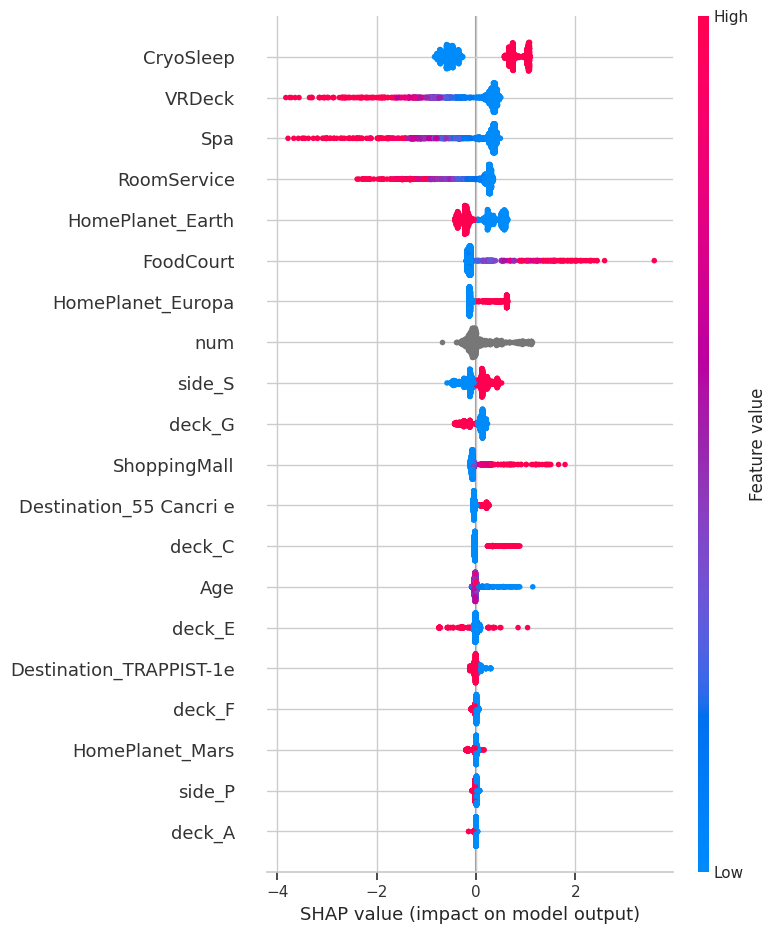

In [47]:
import shap
# XAI
# Initialize SHAP explainer with the trained Gradient Boosting model
explainer = shap.Explainer(gbm_model, X_train)

# Compute SHAP values for a sample of the validation data
shap_values = explainer.shap_values(X_val)

# Plot SHAP summary plot to visualize feature importances
shap.summary_plot(shap_values, X_val)
